##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Data augmentation

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/data_augmentation"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/data_augmentation.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview

This tutorial demonstrates manual image manipulations and augmentation using `tf.image`.

Data augmentation is a common technique to improve results and avoid overfitting, see [Overfitting and Underfitting](../keras/overfit_and_underfit.ipynb) for others.

Before running this notebook, you should type these two lines of code in the Anaconda's prompt :
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension

## Setup

In [5]:
!pip install -q git+https://github.com/tensorflow/docs

In [7]:
import urllib

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
AUTOTUNE = tf.data.experimental.AUTOTUNE

import tensorflow_docs as tfdocs
import tensorflow_docs.plots

import tensorflow_datasets as tfds

import PIL.Image

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 5)

import numpy as np

C:\Users\SchallerG\Anaconda3\envs\tensorflow_v29\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's check the data augmentation features on an image and then augment a whole dataset later to train a model.

Download [this image](https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg), by Von.grzanka, for augmentation.

17858/17858 [==============================] - 0s 0s/step


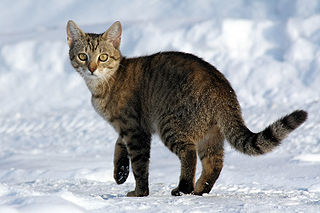

In [8]:
image_path = tf.keras.utils.get_file("cat.jpg", "https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg")
PIL.Image.open(image_path)

Read and decode the image to tensor format.

In [9]:
image_string=tf.io.read_file(image_path)
image=tf.image.decode_jpeg(image_string,channels=3)

A function to visualize and compare the original and augmented image side by side.

In [10]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

## Augment a single image

### Flipping the image
Flip the image either vertically or horizontally.

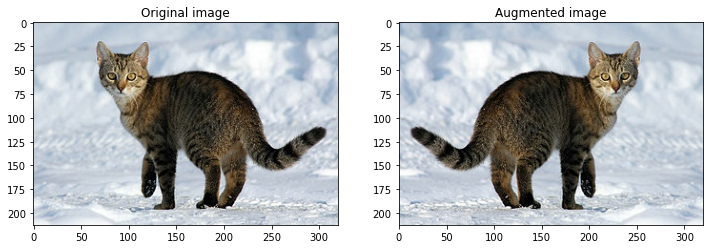

In [11]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

### Grayscale the image
Grayscale an image.

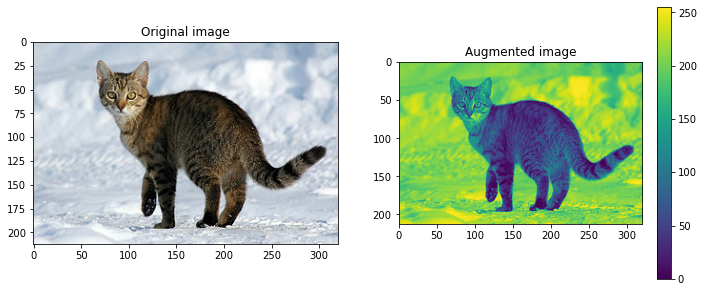

In [12]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
plt.colorbar()

### Saturate the image
Saturate an image by providing a saturation factor.

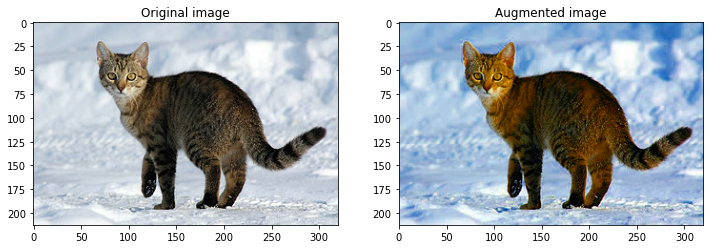

In [13]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

### Change image brightness
Change the brightness of image by providing a brightness factor.

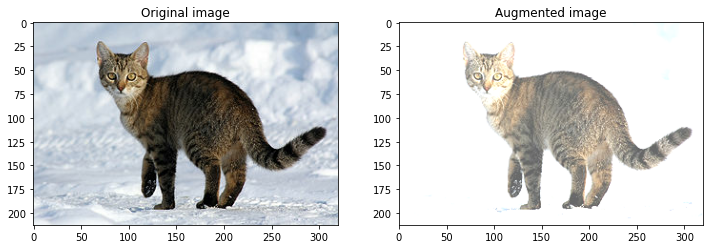

In [14]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

### Rotate the image
Rotate an image by 90 degrees.

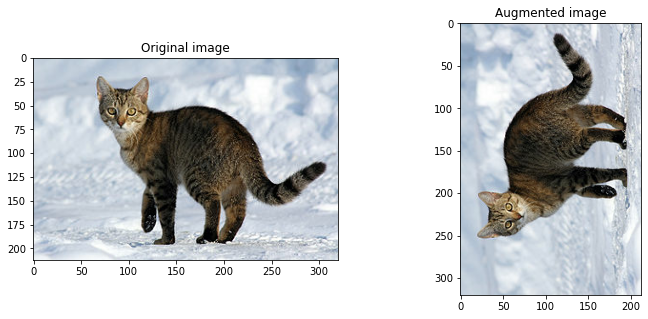

In [15]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

### Center crop the image
Crop the image from center upto the image part you desire.

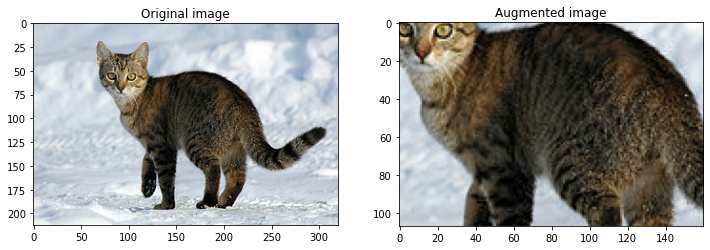

In [16]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

See the `tf.image` reference for details about available augmentation options.

## Augment a dataset and train a model with it

Train a model on an augmented dataset.

Note: The problem solved here is somewhat artificial. It trains a densely connected network to be shift invariant by jittering the input images. It's much more efficient to use convolutional layers instead.

In [17]:
dataset, info =  tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples= info.splits['train'].num_examples

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:  25%|██▌       | 1/4 [00:00<00:00,  5.01 url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:  25%|██▌       | 1/4 [00:00<00:00,  5.01 url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...:   0%|          | 0/1 [00:00<?, ? file/s]

Dl Completed...:  25%|██▌       | 1/4 [00:00<00:00,  5.01 url/s]1 file/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/1 [00:00<?, ? MiB/s]

Dl Size...:   0%|          

Generating train examples...: 5814 examples [00:04, 1295.74 examples/s]
Generating train examples...: 5973 examples [00:04, 1327.24 examples/s]
Generating train examples...: 6113 examples [00:04, 1347.33 examples/s]
Generating train examples...: 6248 examples [00:04, 1347.56 examples/s]
Generating train examples...: 6385 examples [00:04, 1354.09 examples/s]
Generating train examples...: 6521 examples [00:05, 1293.71 examples/s]
Generating train examples...: 6656 examples [00:05, 1308.61 examples/s]
Generating train examples...: 6793 examples [00:05, 1326.26 examples/s]
Generating train examples...: 6926 examples [00:05, 1323.42 examples/s]
Generating train examples...: 7059 examples [00:05, 1306.54 examples/s]
Generating train examples...: 7198 examples [00:05, 1327.11 examples/s]
Generating train examples...: 7345 examples [00:05, 1369.06 examples/s]
Generating train examples...: 7490 examples [00:05, 1392.91 examples/s]
Generating train examples...: 7630 examples [00:05, 1306.04 exam

Generating train examples...: 20500 examples [00:15, 1345.14 examples/s]
Generating train examples...: 20640 examples [00:15, 1351.54 examples/s]
Generating train examples...: 20797 examples [00:16, 1354.87 examples/s]
Generating train examples...: 20940 examples [00:16, 1371.92 examples/s]
Generating train examples...: 21094 examples [00:16, 1362.52 examples/s]
Generating train examples...: 21236 examples [00:16, 1375.33 examples/s]
Generating train examples...: 21374 examples [00:16, 1375.91 examples/s]
Generating train examples...: 21512 examples [00:16, 1336.23 examples/s]
Generating train examples...: 21652 examples [00:16, 1328.80 examples/s]
Generating train examples...: 21811 examples [00:16, 1344.77 examples/s]
Generating train examples...: 21973 examples [00:16, 1364.39 examples/s]
Generating train examples...: 22110 examples [00:17, 1356.44 examples/s]
Generating train examples...: 22267 examples [00:17, 1361.17 examples/s]
Generating train examples...: 22411 examples [00:17

Generating train examples...: 35644 examples [00:27, 1333.57 examples/s]
Generating train examples...: 35791 examples [00:27, 1364.22 examples/s]
Generating train examples...: 35941 examples [00:27, 1344.23 examples/s]
Generating train examples...: 36076 examples [00:27, 1344.42 examples/s]
Generating train examples...: 36226 examples [00:27, 1331.11 examples/s]
Generating train examples...: 36360 examples [00:27, 1330.16 examples/s]
Generating train examples...: 36494 examples [00:28, 1330.47 examples/s]
Generating train examples...: 36628 examples [00:28, 1333.13 examples/s]
Generating train examples...: 36791 examples [00:28, 1359.09 examples/s]
Generating train examples...: 36935 examples [00:28, 1375.06 examples/s]
Generating train examples...: 37097 examples [00:28, 1385.77 examples/s]
Generating train examples...: 37238 examples [00:28, 1388.67 examples/s]
Generating train examples...: 37377 examples [00:28, 1387.07 examples/s]
Generating train examples...: 37517 examples [00:28

Generating train examples...: 51057 examples [00:38, 1131.88 examples/s]
Generating train examples...: 51171 examples [00:38, 1128.10 examples/s]
Generating train examples...: 51284 examples [00:39, 1125.12 examples/s]
Generating train examples...: 51397 examples [00:39, 1078.46 examples/s]
Generating train examples...: 51530 examples [00:39, 1105.75 examples/s]
Generating train examples...: 51657 examples [00:39, 1146.92 examples/s]
Generating train examples...: 51787 examples [00:39, 1143.07 examples/s]
Generating train examples...: 51908 examples [00:39, 1157.54 examples/s]
Generating train examples...: 52040 examples [00:39, 1194.54 examples/s]
Generating train examples...: 52161 examples [00:39, 1198.97 examples/s]
Generating train examples...: 52298 examples [00:39, 1247.94 examples/s]
Generating train examples...: 52431 examples [00:40, 1270.30 examples/s]
Generating train examples...: 52593 examples [00:40, 1330.31 examples/s]
Generating train examples...: 52735 examples [00:40

Shuffling ~\tensorflow_datasets\mnist\3.0.1.incompleteAF6RRB\mnist-train.tfrecord*...: 100%|██████████| 60000/60000 [00:02<00:00, 26441.79 examples/s]
Generating splits...:  50%|█████     | 1/2 [00:47<00:47, 47.99s/ splits]                                                                              
Generating test examples...: 0 examples [00:00, ? examples/s]
Generating test examples...: 188 examples [00:00, 1631.84 examples/s]
Generating test examples...: 381 examples [00:00, 1780.56 examples/s]
Generating test examples...: 583 examples [00:00, 1881.17 examples/s]
Generating test examples...: 804 examples [00:00, 1902.68 examples/s]
Generating test examples...: 1001 examples [00:00, 1910.14 examples/s]
Generating test examples...: 1208 examples [00:00, 1872.09 examples/s]
Generating test examples...: 1396 examples [00:00, 1864.51 examples/s]
Generating test examples...: 1621 examples [00:00, 1899.80 examples/s]
Generating test examples...: 1811 examples [00:00, 1891.76 examples/s]
G

Dataset mnist downloaded and prepared to ~\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


Write a function to augment the images. Map it over the the dataset. This returns a dataset that augments the data on the fly.

In [18]:
def convert(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  return image, label

def augment(image,label):
  image,label = convert(image, label)
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  image = tf.image.resize_with_crop_or_pad(image, 34, 34) # Add 6 pixels of padding
  image = tf.image.random_crop(image, size=[28, 28, 1]) # Random crop back to 28x28
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness

  return image,label

In [19]:
BATCH_SIZE = 64
# Only use a subset of the data so it's easier to overfit, for this tutorial
NUM_EXAMPLES = 2048

Create the augmented dataset.

In [20]:
augmented_train_batches = (
    train_dataset
    # Only train on a subset, so you can quickly see the effect.
    .take(NUM_EXAMPLES)
    .cache()
    .shuffle(num_train_examples//4)
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
) 

And a non-augmented one for comparison.

In [21]:
non_augmented_train_batches = (
    train_dataset
    # Only train on a subset, so you can quickly see the effect.
    .take(NUM_EXAMPLES)
    .cache()
    .shuffle(num_train_examples//4)
    # No augmentation.
    .map(convert, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
) 

Setup the validation dataset. This doesn't change whether or not you're using the augmentation.

In [22]:
validation_batches = (
    test_dataset
    .map(convert, num_parallel_calls=AUTOTUNE)
    .batch(2*BATCH_SIZE)
)

Create and compile the model. The model is a two layered, fully-connected neural network without convolution.

In [23]:
def make_model():
  model = tf.keras.Sequential([
      layers.Flatten(input_shape=(28, 28, 1)),
      layers.Dense(4096, activation='relu'),
      layers.Dense(4096, activation='relu'),
      layers.Dense(10)
  ])
  model.compile(optimizer = 'adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

Train the model, **without** augmentation:

In [24]:
model_without_aug = make_model()

no_aug_history = model_without_aug.fit(non_augmented_train_batches, epochs=50, validation_data=validation_batches)

Epoch 1/50
32/32 [==============================] - 9s 259ms/step - loss: 0.8176 - accuracy: 0.7407 - val_loss: 0.4086 - val_accuracy: 0.8738
Epoch 2/50
32/32 [==============================] - 8s 257ms/step - loss: 0.1822 - accuracy: 0.9448 - val_loss: 0.3086 - val_accuracy: 0.9123
Epoch 3/50
32/32 [==============================] - 8s 249ms/step - loss: 0.0697 - accuracy: 0.9775 - val_loss: 0.3023 - val_accuracy: 0.9180
Epoch 4/50
32/32 [==============================] - 8s 250ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.3362 - val_accuracy: 0.9188
Epoch 5/50
32/32 [==============================] - 8s 250ms/step - loss: 0.0297 - accuracy: 0.9922 - val_loss: 0.3162 - val_accuracy: 0.9271
Epoch 6/50
32/32 [==============================] - 8s 247ms/step - loss: 0.0332 - accuracy: 0.9912 - val_loss: 0.5510 - val_accuracy: 0.8882
Epoch 7/50
32/32 [==============================] - 8s 248ms/step - loss: 0.0932 - accuracy: 0.9712 - val_loss: 0.3583 - val_accuracy: 0.9168
Epoch 

Train it again with augmentation:

In [25]:
model_with_aug = make_model()

aug_history = model_with_aug.fit(augmented_train_batches, epochs=50, validation_data=validation_batches)

Epoch 1/50
32/32 [==============================] - 9s 251ms/step - loss: 2.4711 - accuracy: 0.2754 - val_loss: 1.3939 - val_accuracy: 0.6580
Epoch 2/50
32/32 [==============================] - 8s 256ms/step - loss: 1.5019 - accuracy: 0.4751 - val_loss: 0.7736 - val_accuracy: 0.7821
Epoch 3/50
32/32 [==============================] - 8s 243ms/step - loss: 1.0757 - accuracy: 0.6396 - val_loss: 0.5717 - val_accuracy: 0.8330
Epoch 4/50
32/32 [==============================] - 8s 249ms/step - loss: 0.7979 - accuracy: 0.7334 - val_loss: 0.4439 - val_accuracy: 0.8683
Epoch 5/50
32/32 [==============================] - 8s 246ms/step - loss: 0.7161 - accuracy: 0.7583 - val_loss: 0.3595 - val_accuracy: 0.8937
Epoch 6/50
32/32 [==============================] - 8s 261ms/step - loss: 0.6007 - accuracy: 0.8018 - val_loss: 0.3023 - val_accuracy: 0.9073
Epoch 7/50
32/32 [==============================] - 9s 284ms/step - loss: 0.5305 - accuracy: 0.8306 - val_loss: 0.2878 - val_accuracy: 0.9121
Epoch 

## Conclusion:

In this example the augmented model converges to an accuracy ~95% on validation set. This is slightly higher (+1%) than the model trained without data augmentation.

(0.75, 1.0)

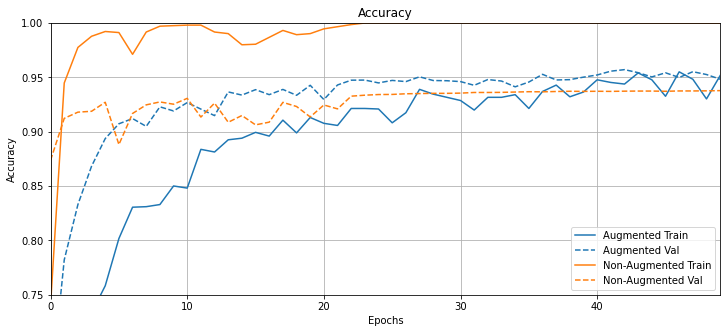

In [26]:
plotter = tfdocs.plots.HistoryPlotter()
plotter.plot({"Augmented": aug_history, "Non-Augmented": no_aug_history}, metric = "accuracy")
plt.title("Accuracy")
plt.ylim([0.75,1])

In terms of loss, the non-augmented model is obviously in the overfitting regime. The augmented model, while a few epoch slower, is still training correctly and clearly not overfitting.

(0.0, 1.0)

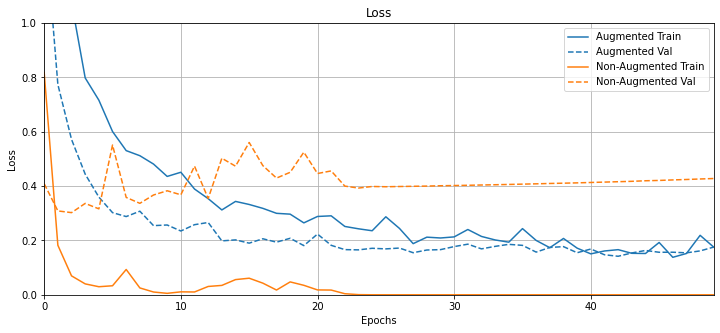

In [27]:
plotter = tfdocs.plots.HistoryPlotter()
plotter.plot({"Augmented": aug_history, "Non-Augmented": no_aug_history}, metric = "loss")
plt.title("Loss")
plt.ylim([0,1])